### Exercise 3 

## Q4 Write a program to verify the calculated probability using Monte Carlo simulation.

In [1]:
l_high = 10 
l_low = 7 
simulations = 1000000
p_l_high = 0.25
observed_pins = 8 
observed_clips = 10 

from scipy.stats import poisson

count_correct_config = 0 
match = 0 
for i in range(simulations):
    steel_quality = np.random.choice([l_high, l_low], p=[p_l_high, 1-p_l_high])
    clips = np.random.poisson(steel_quality)
    pins = np.random.poisson(steel_quality)

    if clips == observed_clips and pins==observed_pins:
        match += 1
        if steel_quality == l_high:
            count_correct_config += 1

estimated_prob_high_quality = count_correct_config/match
print(f"(Probability that the company used high quality steel: {estimated_prob_high_quality})")

### Exercise 5 

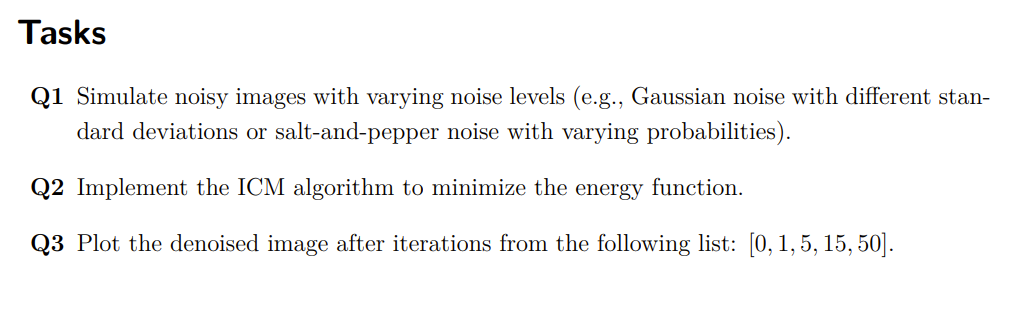
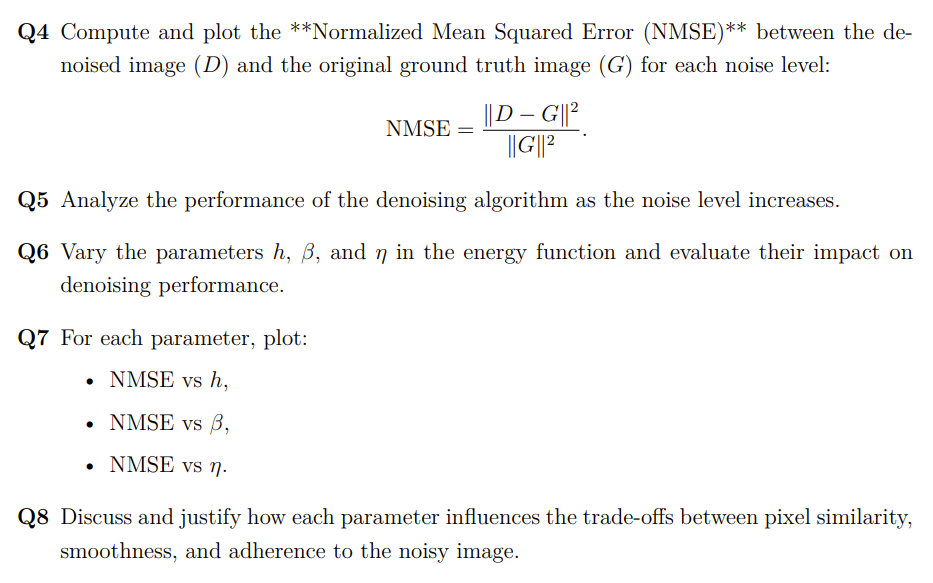

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

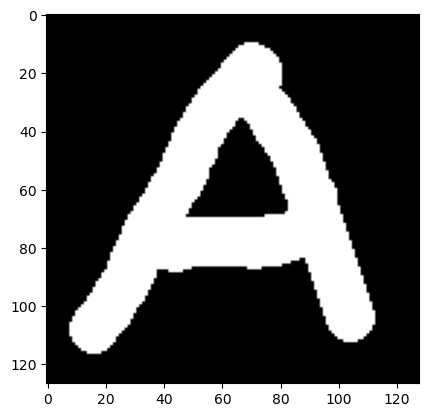

In [5]:
# Load Image
img = pd.read_csv("letterA.csv").to_numpy()
plt.imshow(img, cmap="gray")
plt.show()

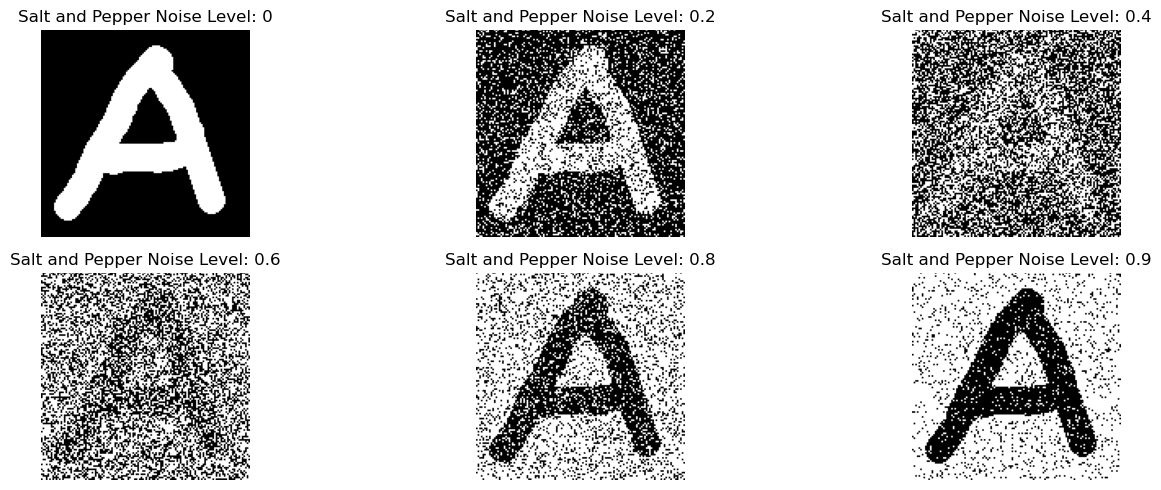

In [14]:
# Q1
def salt_pepper_noise(p: float, img: np.array) -> np.array:
    noise_matrix = np.random.choice([-1, 1], img.shape, p=[p, 1-p])
    noisy_image = noise_matrix * img
    return noisy_image

def gaussian_nosie(mean: float, std: float, img: np.array) -> np.array: 
    noise_matrix = np.random.normal(mean,std,img.shape)
    noisy_image = noise_matrix + img 
    return  noisy_image

noise_levels = [0, 0.2, 0.4, 0.6, 0.8, 0.9]
images = [salt_pepper_noise(n, img) for n in noise_levels]

fig, ax = plt.subplots(2, 3, figsize=(15, 5)) 

for i, image in enumerate(images):
    ax.flat[i].imshow(image, cmap="gray")
    ax.flat[i].set_title(f"Salt and Pepper Noise Level: {noise_levels[i]}")
    ax.flat[i].axis('off')  
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.savefig("different_noise.png")
plt.show()

In [50]:
import numpy as np
from tqdm import trange

def calculate_energy(h: int, beta: int, eta: int, x: np.array, neighb: np.array, y: np.array, index) -> int:
    first_term = np.sum(x)
    second_term = np.sum(x[index] * x[neighb])
    third_term = np.sum(x*y)
    E = h*first_term - beta * second_term - eta * third_term
    return E

def get_neighbours(flat_image: np.array, num_of_columns: int, index: int) -> np.array:
    rows = len(flat_image)//num_of_columns
    row_index = index // num_of_columns
    col_index = index % num_of_columns
    
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for r, c in directions:
        i, j = row_index + r, col_index + c
        if 0 <= i < rows and 0 <= j < num_of_columns:
            neighbors.append(i * num_of_columns + j)
    return np.array(neighbors)

def ICM(h: int, beta: int, eta:int, noisy_image: np.array, iterations: int, iterations_to_save: list) -> np.array:
    saved_images = [noisy_image]
    rows, columns = noisy_image.shape
    y = noisy_image.copy().flatten()
    x = y.copy()
    for e in trange(iterations):
        for j in range(len(x)):
            neighbors = get_neighbours(x, columns, j)
            x[j] = 1
            E1 = calculate_energy(h, beta, eta, x, neighbors, y, j)
            x[j] = -1
            E2 = calculate_energy(h, beta, eta, x, neighbors, y, j)
            if E1 <= E2:
                x[j] = 1
            else:
                x[j] = -1
        if e+1 in iterations_to_save:
            saved_images.append(x.reshape(noisy_image_sp.shape))
    return saved_images

def NMSE(t_image, d_image):
    numerator = np.sum(np.abs(t_image - d_image)**2)
    denominator = np.sum(np.abs(t_image)**2)
    error = numerator / denominator 
    return error

def plot(images, iterations_to_save, noisy_image):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 5)) 
    ax[0].imshow(noisy_image, cmap="gray")
    ax[0].set_title(f"{0} Iterations")
    for i, img in enumerate(images):
        if i < len(images)-1:
            ax[i+1].imshow(images[i], cmap="gray")
            ax[i+1].set_title(f"{iterations_to_save[i]} Iterations")
    plt.savefig("denoised.png")

def ICM_different_noise(h: int, beta: int, eta:int, iterations: int, noise_levels: list, true_image: np.array) -> np.array:
    rows, columns = true_image.shape
    error = []
    for n in noise_levels:
        noisy_image = salt_pepper_noise(n, true_image)
        y = noisy_image.copy().flatten()
        x = y.copy()
        for e in trange(iterations):
            for j in range(len(x)):
                neighbors = get_neighbours(x, columns, j)
                x[j] = 1
                E1 = calculate_energy(h, beta, eta, x, neighbors, y, j)
                x[j] = -1
                E2 = calculate_energy(h, beta, eta, x, neighbors, y, j)
                if E1 <= E2:
                    x[j] = 1
                else:
                    x[j] = -1
        error.append(NMSE(true_image, x.reshape(true_image.shape)))           
    return error

def ICM_varying_b(h:int, beta: list, eta:int, iterations: int, noisy_image: np.array, true_image: np.array) -> np.array:
    rows, columns = true_image.shape
    error = []
    dimages = []
    y = noisy_image.copy().flatten()
    x = y.copy()
    for b in beta:
        for e in trange(iterations):
            for j in range(len(x)):
                neighbors = get_neighbours(x, columns, j)
                x[j] = 1
                E1 = calculate_energy(h, b, eta, x, neighbors, y, j)
                x[j] = -1
                E2 = calculate_energy(h, b, eta, x, neighbors, y, j)
                if E1 <= E2:
                    x[j] = 1
                else:
                    x[j] = -1
        error.append(NMSE(true_image, x.reshape(true_image.shape)))  
        dimages.append(x.reshape(true_image.shape))
    return error, dimages

def ICM_varying_eta(h:int, beta: int, etas:list, iterations: int, noisy_image: np.array, true_image: np.array) -> np.array:
    rows, columns = true_image.shape
    dimages = []
    error = []
    y = noisy_image.copy().flatten()
    x = y.copy()
    for eta in etas:
        for e in trange(iterations):
            for j in range(len(x)):
                neighbors = get_neighbours(x, columns, j)
                x[j] = 1
                E1 = calculate_energy(h, beta, eta, x, neighbors, y, j)
                x[j] = -1
                E2 = calculate_energy(h, beta, eta, x, neighbors, y, j)
                if E1 <= E2:
                    x[j] = 1
                else:
                    x[j] = -1
        error.append(NMSE(true_image, x.reshape(true_image.shape)))     
        dimages.append(x.reshape(true_image.shape))
    return error, dimages

def ICM_varying_h(hs:list, beta: int, eta:int, iterations: int, noisy_image: np.array, true_image: np.array) -> np.array:
    rows, columns = true_image.shape
    error = []
    dimages = []
    y = noisy_image.copy().flatten()
    x = y.copy()
    for h in hs:
        for e in trange(iterations):
            for j in range(len(x)):
                neighbors = get_neighbours(x, columns, j)
                x[j] = 1
                E1 = calculate_energy(h, beta, eta, x, neighbors, y, j)
                x[j] = -1
                E2 = calculate_energy(h, beta, eta, x, neighbors, y, j)
                if E1 <= E2:
                    x[j] = 1
                else:
                    x[j] = -1
        error.append(NMSE(true_image, x.reshape(true_image.shape)))   
        dimages.append(x.reshape(true_image.shape))
    return error, dimages

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:24<00:00,  2.88s/it]


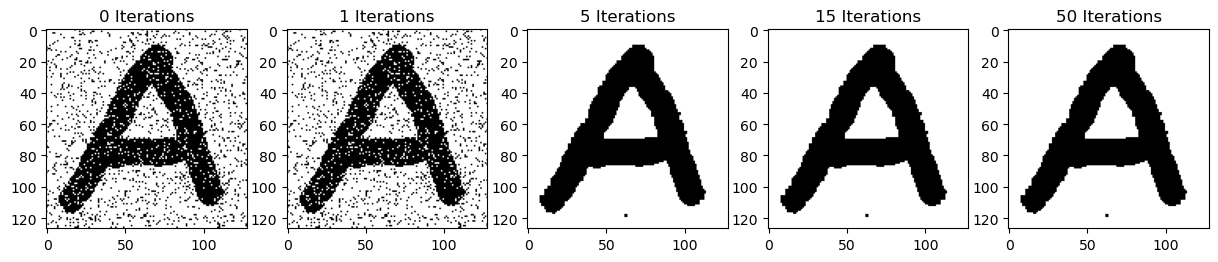

In [22]:
h = 0
beta = 1
eta = 1
iterations = 50
noisy_image_sp = salt_pepper_noise(0.9, img)
noisy_image_gau = gaussian_nosie(1, 0.4, img)
iterations_to_save =  [1, 5, 15, 50]
noisy_image = noisy_image_sp

denoised_images = ICM(h, beta, eta, noisy_image, iterations, iterations_to_save)
plot(denoised_images, iterations_to_save, noisy_image)

In [20]:
# Q4 
h = 0
beta = 1
eta = 1
iterations = 10
noise_levels = np.linspace(0, 1, 30)
errors = ICM_different_noise(h, beta, eta, iterations, noise_levels, img)

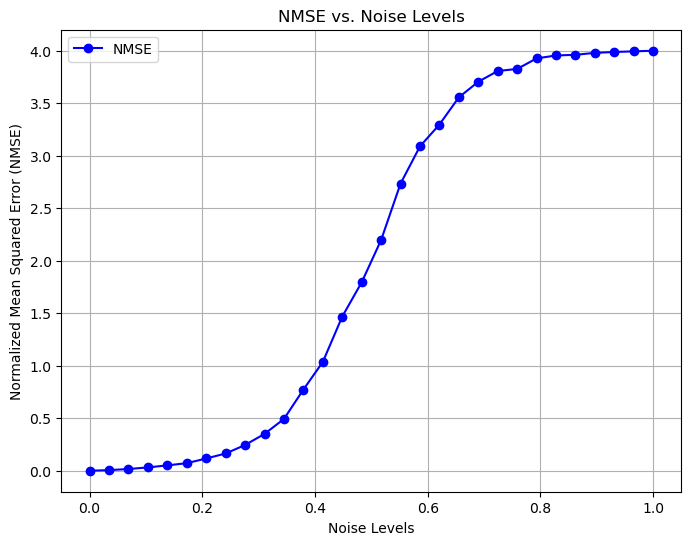

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(noise_levels, errors, marker='o', linestyle='-', color='b', label='NMSE')
plt.xlabel('Noise Levels')
plt.ylabel('Normalized Mean Squared Error (NMSE)')
plt.title('NMSE vs. Noise Levels')
plt.grid(True)
plt.legend()
plt.savefig("Varying_noise_level_NMSE.png")
plt.show()

In [46]:
noisy_image_sp = salt_pepper_noise(0.2, img)
noisy_image = noisy_image_sp
iterations = 10
beta = np.linspace(0,2.5,10)
error, denoised_images = ICM_varying_b(h, beta, eta, iterations, noisy_image, img)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.13s/it]


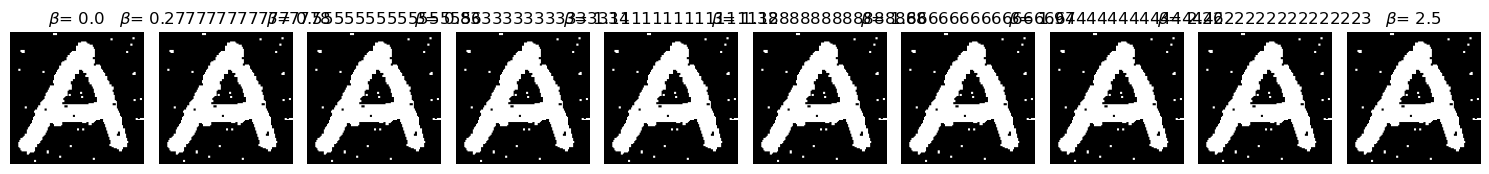

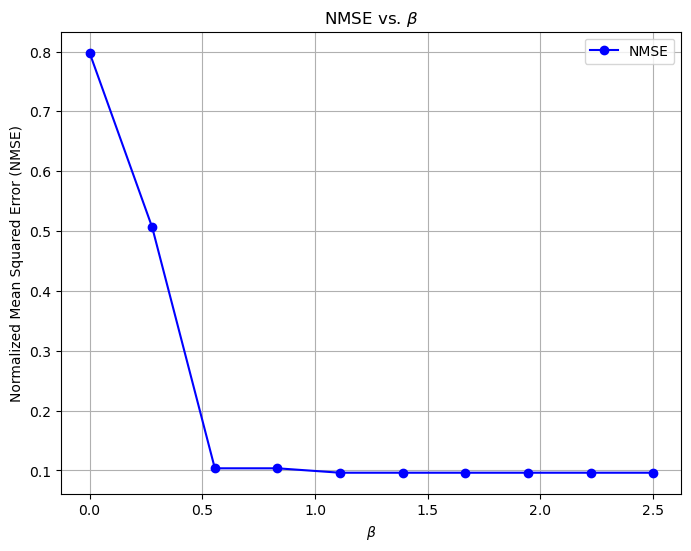

In [47]:
fig, ax = plt.subplots(1, len(beta), figsize=(15, 5)) 
for i, image in enumerate(denoised_images):
    ax[i].imshow(image, cmap="gray")
    ax[i].set_title(fr"$\beta$= {beta[i]}")
    ax[i].axis('off')  
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.savefig("beta_pics.png")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(beta, error, marker='o', linestyle='-', color='b', label='NMSE')
plt.xlabel(fr'$\beta$')
plt.ylabel('Normalized Mean Squared Error (NMSE)')
plt.title(fr'NMSE vs. $\beta$')
plt.grid(True)
plt.legend()
plt.savefig("varyingbetaNMSE.png")
plt.show()

In [66]:
noisy_image_sp = salt_pepper_noise(0.2, img)
noisy_image = noisy_image_sp
iterations = 10
beta = 1
hs = [5]
error_hs, denoised_images_hs = ICM_varying_h(hs, beta, eta, iterations, noisy_image, img)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.17s/it]


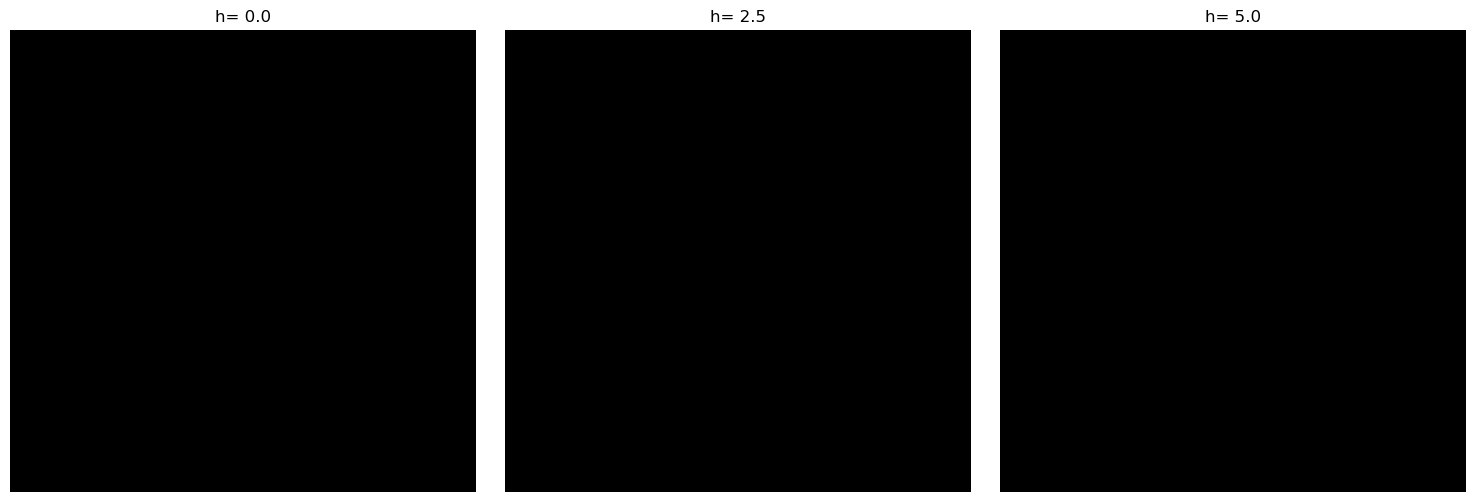

In [65]:
fig, ax = plt.subplots(1, len(hs), figsize=(15, 5)) 
for i, image in enumerate(denoised_images_hs):
    ax[i].imshow(image, cmap="gray")
    ax[i].set_title(fr"h= {hs[i]}")
    ax[i].axis('off')  
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
#plt.savefig("hs_pics.png")
plt.show()

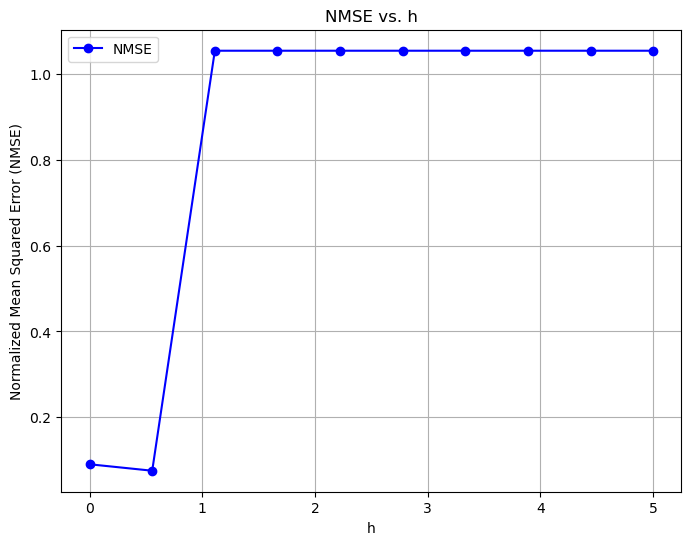

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(hs, error_hs, marker='o', linestyle='-', color='b', label='NMSE')
plt.xlabel(fr'h')
plt.ylabel('Normalized Mean Squared Error (NMSE)')
plt.title(fr'NMSE vs. h')
plt.grid(True)
plt.legend()
#plt.savefig("varyinghsNMSE.png")
plt.show()

In [ ]:
noisy_image_sp = salt_pepper_noise(0.2, img)
noisy_image = noisy_image_sp
iterations = 10
beta = 1
h = 0
etas = np.linspace(0,5,10)
error_hs, denoised_images_hs = ICM_varying_eta(h, beta, etas, iterations, noisy_image, img)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(hs, error_hs, marker='o', linestyle='-', color='b', label='NMSE')
plt.xlabel(fr'eta')
plt.ylabel('Normalized Mean Squared Error (NMSE)')
plt.title(fr'NMSE vs. eta')
plt.grid(True)
plt.legend()
plt.savefig("varyingetaNMSE.png")
plt.show()